In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.set_cmap(plt.cm.Paired)

<Figure size 432x288 with 0 Axes>

In [7]:
# pandasでの読み込み
df = pd.read_csv("./2D_example.csv" , header=None )
df.head()

,0,1,2
0,1,-7.428476,1.509903
1,0,2.980693,1.960821
2,0,3.988255,4.636389
3,1,-5.789437,-4.621614
4,1,-4.894447,-3.269730


In [8]:
# numpy での読み込み
data = np.loadtxt("./2D_example.csv" , delimiter= ',')

In [13]:
# 1列目の取得
label = data[:, 0].astype(int)
label

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [18]:
# 2,3列目に取得
x = data[:, 1:3]
x

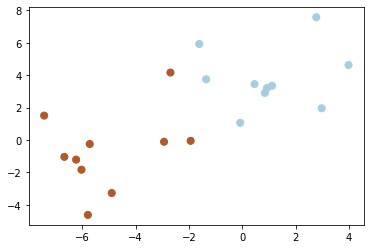

In [26]:
# 実際にプロットしてみる。
plt.scatter(x[:,0] , x[:,1] , c = label , s=50)

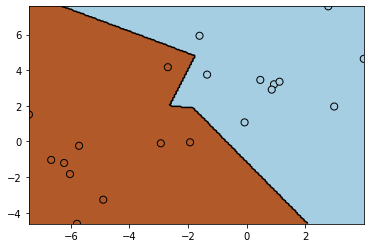

In [36]:
# k近傍法での識別(近くのデータが何であるかで識別する。)
from sklearn import neighbors

# オブジェクトの作成
clf = neighbors.KNeighborsClassifier(n_neighbors=1)

# 学習
clf.fit(x, label) 

plt.scatter(x[:, 0], x[:, 1], marker='o', s=50, c=label, edgecolors='k')
plotBoundary(x, clf) # 境界線の描画

In [29]:
# 境界線を引く関数の定義

def plotBoundary(X, clf, mesh=True, boundary=True, n_neighbors=1):

    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()]) # evaluate the value 
    
    Z = Z.reshape(XX.shape) # just reshape

    if mesh:
        plt.pcolormesh(XX, YY, Z, zorder=-10) # paint in 2 colors, if Z > 0 or not

    if boundary:
        plt.contour(XX, YY, Z, 
                    colors='k', linestyles='-', levels=[0.5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)


#### 癌のデータでやってみる。





In [37]:
from sklearn.datasets import load_breast_cancer

In [45]:
data = load_breast_cancer()

In [47]:
X = data.data

In [54]:
# データの大きさを確認
# 569のデータで30個の特徴量
X.shape

(569, 30)

In [55]:
# それぞれのデータの特徴量に関して
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [56]:
y = data.target

In [59]:
# 569個のデータが入っている。
y.shape

(569,)

In [60]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [61]:
# ロジスティック回帰で分類モデルを作成してみる。
from sklearn import linear_model

# 識別器の作成
clf = linear_model.LogisticRegression()

In [62]:
clf

LogisticRegression()

In [65]:
# 学習データとテストデータに分ける.（今回は半分ずつに分けて行く。）
n_samples = X.shape[0]
n_train = n_samples // 2
n_test = n_samples - n_train

In [86]:
train_index = range(0, n_train)
test_index = range(n_train , n_samples)

In [87]:
# データを訓練用とテスト用に分けてみる。
X_train = X[train_index ]
X_test  = X[test_index]

y_train = y[train_index]
y_test = y[test_index]

In [88]:
# 識別器の学習
clf.fit(X_train, y_train)

/Users/kiichiro/.local/share/virtualenvs/scikit_learn_practice-ap7Ejka1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [89]:
# 96% 成功している。
clf.score(X_train, y_train)

0.9612676056338029

In [90]:
# テストデータのスコア確認
clf.score(X_test, y_test)

0.9473684210526315

In [91]:
# データの予測に関して
clf.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1])

(1, 30)

285